In [1]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
import datetime
from scipy import stats

In [2]:
import matplotlib as mpl
mpl.rc('font',family='Times New Roman')

tbfont = {'fontname': 'Times New Roman Bold'}
tfont = {'fontname':'Times New Roman'}

mpl.rc('text', usetex=True)

In [3]:
gram = pd.read_csv('Grammar SA MTurk - attchecks - HUGE_June 14, 2019_08.35.csv', encoding = 'utf-8')
gram = gram[2:]
gram['Duration (in seconds)'] = gram['Duration (in seconds)'].astype(int)

gram['score'] = gram['SC0'].astype(float)
gram['absAssess0'] = gram['absAssess0'].astype(float)
gram['absAssess1'] = gram['absAssess1'].astype(float)
gram['relAssess0'] = gram['relAssess0_1'].astype(float)
gram['relAssess1'] = gram['relAssess1_1'].astype(float)
gram['diffSelf0'] = gram['diffSelf0_1'].astype(float)
gram['diffSelf1'] = gram['diffSelf1_1'].astype(float)
gram['diffOther0'] = gram['diffOther0_1'].astype(float)
gram['diffOther1'] = gram['diffOther1_1'].astype(float)
gram['grammarAssess0'] = gram['grammarAssess0_1'].astype(float)
gram['grammarAssess1'] = gram['grammarAssess1_1'].astype(float)


len(gram)

4083

In [4]:
gram = gram[gram.Finished == 'True']
len(gram)

3929

In [5]:
gram.SC0.value_counts()

11    416
10    403
12    377
9     366
8     329
13    314
7     281
14    254
6     254
5     217
15    175
4     148
3     127
16     85
17     57
2      56
1      26
18     24
0       8
19      8
20      4
Name: SC0, dtype: int64

In [6]:
gram.IPAddress.value_counts()

98.176.238.152     49
24.213.184.142      9
73.11.171.41        7
45.46.145.188       4
23.111.188.5        3
65.24.184.141       3
191.96.97.58        3
208.85.253.4        3
24.250.162.66       2
65.60.211.5         2
75.98.98.2          2
47.148.167.203      2
98.26.224.159       2
41.215.78.18        2
174.49.229.78       2
159.140.254.102     2
45.56.174.147       2
67.8.46.228         2
24.186.55.173       2
72.240.112.96       2
108.195.92.66       2
97.92.237.78        2
23.123.1.9          2
68.203.142.133      2
76.19.34.45         2
136.33.69.69        2
204.186.253.54      2
187.84.80.43        2
67.55.77.188        2
71.72.162.185       2
                   ..
67.182.23.162       1
23.241.235.92       1
96.37.50.12         1
180.191.151.166     1
107.185.213.247     1
207.126.212.11      1
100.2.231.150       1
154.155.31.232      1
173.3.135.87        1
148.75.180.113      1
68.207.246.47       1
98.117.199.57       1
104.200.36.246      1
75.118.235.111      1
156.26.45.

In [7]:
len(gram)

3929

In [8]:
gram = gram[gram.IPAddress != '98.176.238.152']
len(gram)

3880

In [9]:
gram = gram[gram.IPAddress != '24.213.184.142']
len(gram)

3871

In [10]:
gram = gram[gram.IPAddress != '73.11.171.41']
len(gram)

3864

In [11]:
gram = gram[gram.IPAddress != '45.46.145.188']
len(gram)

3860

In [12]:
gram.Finished.value_counts()

True    3860
Name: Finished, dtype: int64

In [13]:
gram.attcheck1.value_counts()

Grammar              3520
Logical reasoning     247
Creative writing       89
Name: attcheck1, dtype: int64

In [14]:
gram.attcheck2.value_counts()

It will be underlined    3616
It will be all caps       132
It will be deleted        109
Name: attcheck2, dtype: int64

In [15]:
gram_att1 = gram[(gram.attcheck1 == 'Grammar') & (gram.attcheck2 == 'It will be underlined')]
len(gram_att1)

3388

In [16]:
gram_att2 = gram[(gram.attcheck12 != 'Logical reasoning') & (gram.attcheck22 != 'It will be all caps')
   & (gram.attcheck12 != 'Creative writing') & (gram.attcheck22 != 'It will be deleted')]
len(gram_att2)

3696

In [17]:
gram_long = gram_att2[gram_att2['Duration (in seconds)'].astype(int) > 300]
len(gram_long)

3616

In [18]:
gram_long.IPAddress.value_counts()

23.111.188.5       3
208.85.253.4       3
191.96.97.58       3
147.135.36.175     2
162.251.221.196    2
67.8.46.228        2
47.148.167.203     2
205.197.219.74     2
108.195.92.66      2
159.140.254.102    2
68.203.142.133     2
72.240.112.96      2
24.186.55.173      2
45.56.174.147      2
75.98.98.2         2
23.123.1.9         2
136.33.69.69       2
47.152.98.57       2
98.26.224.159      2
65.111.103.117     2
24.129.80.157      2
65.60.211.5        2
24.250.162.66      2
76.19.34.45        2
66.191.255.194     2
73.124.108.33      2
152.16.191.122     2
104.238.37.173     2
70.101.23.72       2
199.101.125.201    2
                  ..
142.196.15.248     1
71.69.160.203      1
206.213.251.31     1
173.21.196.106     1
67.182.23.162      1
67.11.234.16       1
70.177.119.51      1
154.155.31.232     1
173.3.135.87       1
148.75.180.113     1
98.117.199.57      1
104.200.36.246     1
75.118.235.111     1
156.26.45.88       1
97.91.189.142      1
73.65.207.40       1
32.214.227.96

In [19]:
gram_long.IPAddress.value_counts().value_counts()

1    3515
2      43
3       3
Name: IPAddress, dtype: int64

In [20]:
gram_long.IPAddress.isna().value_counts()

False    3610
True        6
Name: IPAddress, dtype: int64

In [21]:
gram_long['IPAddress'].value_counts() > 1
gram_all = gram_long.groupby('IPAddress').filter(lambda x: len(x) == 1).drop_duplicates(subset='IPAddress')
len(gram_all)

3515

In [22]:
params = {'axes.labelsize': 20,'axes.titlesize':20, 'text.fontsize': 20, 'legend.fontsize': 20, 'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)

/Users/racheljansen/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  mplDeprecation)


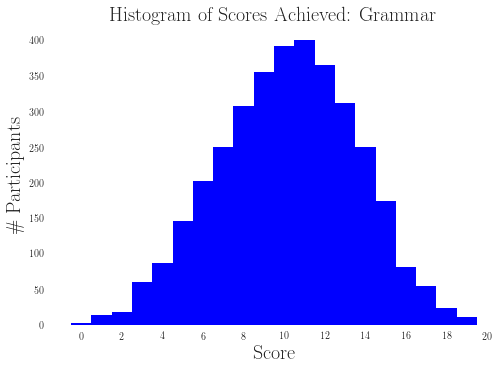

In [23]:
fig, ax = plt.subplots()
plt.hist(gram_all.score, bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],color='b',align='left')
plt.title('Histogram of Scores Achieved: Grammar',fontsize=20)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks([0,50,100,150,200,250,300,350,400])

ax.set_xlabel('Score',fontsize=20)#
ax.set_ylabel('\# Participants',fontsize=20)

ax.set_facecolor('white')
plt.show()
# fig.savefig('figs/score_hist_grammar.eps', dpi=1000)

In [24]:
gram_all['gender'].value_counts()

Woman                1780
Man                  1698
Prefer not to say      13
Other                  12
Name: gender, dtype: int64

In [25]:
gram_all.race.value_counts()

White                                                                                     2560
Black or African American                                                                  304
Asian/Asian American                                                                       246
Hispanic or Latino                                                                         215
White,Hispanic or Latino                                                                    35
Other                                                                                       30
Prefer not to say                                                                           20
American Indian or Alaska Native                                                            19
White,Black or African American                                                             16
White,Asian/Asian American                                                                  12
White,American Indian or Alaska Native            

In [26]:
gram_all['age_groups'] = np.where(gram_all.age.astype(float) <= 35, '18-34', 
                              np.where(gram_all.age.astype(float) >=55 , '55+', 
                                       '35-54'))
gram_all.age_groups.value_counts()

18-34    1982
35-54    1175
55+       358
Name: age_groups, dtype: int64

In [27]:
gram_ages = gram_all[(gram_all.age.astype(float) < 100) & (gram_all.age.astype(float) >= 18)]

In [28]:
len(gram_ages)

3497

In [29]:
len(gram_all)

3515

In [30]:
gram_ages.age.astype(float).max()

88.0

In [31]:
gram_ages.age.astype(float).mean()

36.53931941664284

In [32]:
gram_all['Duration (in seconds)'].mean()/60

19.61240872451399

In [33]:
print('mean score: ', gram_all['score'].mean(), 'out of 20')
print('std score: ', gram_all['score'].std())
print('mean post- percentile estimate', gram_all.relAssess1.mean(), 'std dev.', gram_all.relAssess1.std())
print('mean post- score estimate', gram_all.absAssess1.mean(), 'std dev.', gram_all.absAssess1.std())
print('mean pre- percentile estimate', gram_all.relAssess0.mean(), 'std dev.', gram_all.relAssess0.std())
print('mean pre- score estimate', gram_all.absAssess0.mean(), 'std dev.', gram_all.absAssess0.std())
print('mean pre- grammar estimate', gram_all.grammarAssess0.mean(), 'std dev.', gram_all.grammarAssess0.std())
print('mean post- grammar estimate', gram_all.grammarAssess1.mean(), 'std dev.', gram_all.grammarAssess1.std())

mean score:  10.17126600284495 out of 20
std score:  3.4021360705337487
mean post- percentile estimate 58.379516358463725 std dev. 20.56975669493571
mean post- score estimate 12.494736842105263 std dev. 3.9110286043866185
mean pre- percentile estimate 68.66600284495021 std dev. 18.6467161949458
mean pre- score estimate 14.949075391180655 std dev. 3.5606735697951533
mean pre- grammar estimate 70.27766714082503 std dev. 18.48646228107146
mean post- grammar estimate 60.25234708392603 std dev. 20.42934969617716


In [34]:
from scipy.stats.stats import pearsonr
print('pre- and post- absolute assessments: ', pearsonr(gram_all.absAssess0.astype(int),gram_all.absAssess1.astype(int)))
print('score and pre- absolute assessments: ', pearsonr(gram_all.score.astype(int),gram_all.absAssess0.astype(int)))
print('score and post- absolute assessments: ', pearsonr(gram_all.score.astype(int),gram_all.absAssess1.astype(int)))

pre- and post- absolute assessments:  (0.6571403728665074, 0.0)
score and pre- absolute assessments:  (0.23260672333420354, 2.126690291981347e-44)
score and post- absolute assessments:  (0.28353478336781857, 5.537296971593398e-66)


In [35]:
print('mean post- diff self', gram_all.diffSelf1.mean(), 
      'std dev.', gram_all.diffSelf1.std() )
print('mean post- diff other', gram_all.diffOther1.mean(), 
      'std dev.', gram_all.diffOther1.std() )

mean post- diff self 5.565007112375533 std dev. 2.2584752081942194
mean post- diff other 6.1610241820768135 std dev. 1.840762467989424


In [36]:
from scipy.stats import ttest_ind

In [37]:
print(len(gram_all[gram_all.score == 19]))
print(len(gram_all[gram_all.score == 20]))

8
4


In [38]:
ttest_ind(gram_all[gram_all.score == 19].absAssess1,gram_all[gram_all.score == 20].absAssess1)

Ttest_indResult(statistic=0.8823767946778113, pvalue=0.398287378503266)

# Model fitting

In [39]:
#independent model
# preds_ind = pd.read_csv('./../../ModelSimulations/preds451_basic_all.csv', encoding = "utf-8")
preds_ind = pd.read_csv('./../../GuessModel/Guess/preds451_basic_all.csv', encoding = "utf-8")

# for preds_basic_grammar.csv:
# epsilons = np.linspace(0.3,0.5,num=11)
# muts = np.linspace(.1,.3,num=11) 

In [40]:
# take the sum of squared errors comparing each individual to the prediction at that true value of correctness

sses = []
for i in range(451): # first loop through each simulated set of values
    pred = preds_ind[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(gram_all['score'],gram_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    sses.append(sse)
# sses

KeyboardInterrupt: 

In [25]:
# best fit independent model is 
# eps:  0.45
# mu:  0.2
print('min sse: ', min(sses))
print('index: ', sses.index(min(sses)))

min sse:  49591.57584122128
index:  239


In [31]:
# for preds451_basic --> guess
epsilons = np.linspace(0,0.5,num=11)
muts = np.linspace(-1,1,num=41)

count = 0
for mut in muts:
    for eps in epsilons: # loop through epsilons
      # loop through mu thetas
        print(count)
        count+=1
        print('mu: ', mut)
        print('eps: ', eps)


0
mu:  -1.0
eps:  0.0
1
mu:  -1.0
eps:  0.05
2
mu:  -1.0
eps:  0.1
3
mu:  -1.0
eps:  0.15000000000000002
4
mu:  -1.0
eps:  0.2
5
mu:  -1.0
eps:  0.25
6
mu:  -1.0
eps:  0.30000000000000004
7
mu:  -1.0
eps:  0.35000000000000003
8
mu:  -1.0
eps:  0.4
9
mu:  -1.0
eps:  0.45
10
mu:  -1.0
eps:  0.5
11
mu:  -0.95
eps:  0.0
12
mu:  -0.95
eps:  0.05
13
mu:  -0.95
eps:  0.1
14
mu:  -0.95
eps:  0.15000000000000002
15
mu:  -0.95
eps:  0.2
16
mu:  -0.95
eps:  0.25
17
mu:  -0.95
eps:  0.30000000000000004
18
mu:  -0.95
eps:  0.35000000000000003
19
mu:  -0.95
eps:  0.4
20
mu:  -0.95
eps:  0.45
21
mu:  -0.95
eps:  0.5
22
mu:  -0.9
eps:  0.0
23
mu:  -0.9
eps:  0.05
24
mu:  -0.9
eps:  0.1
25
mu:  -0.9
eps:  0.15000000000000002
26
mu:  -0.9
eps:  0.2
27
mu:  -0.9
eps:  0.25
28
mu:  -0.9
eps:  0.30000000000000004
29
mu:  -0.9
eps:  0.35000000000000003
30
mu:  -0.9
eps:  0.4
31
mu:  -0.9
eps:  0.45
32
mu:  -0.9
eps:  0.5
33
mu:  -0.85
eps:  0.0
34
mu:  -0.85
eps:  0.05
35
mu:  -0.85
eps:  0.1
36
mu:  -0.85


In [79]:
# for preds451_basic --> no guess
epsilons = np.linspace(0,0.5,num=11)
muts = np.linspace(-1,1,num=41)

count = 0
for eps in epsilons: # loop through epsilons
     for mut in muts: # loop through mu thetas
        print(count)
        count+=1
        print('eps: ', eps)
        print('mu: ', mut)

0
eps:  0.0
mu:  -1.0
1
eps:  0.0
mu:  -0.95
2
eps:  0.0
mu:  -0.9
3
eps:  0.0
mu:  -0.85
4
eps:  0.0
mu:  -0.8
5
eps:  0.0
mu:  -0.75
6
eps:  0.0
mu:  -0.7
7
eps:  0.0
mu:  -0.6499999999999999
8
eps:  0.0
mu:  -0.6
9
eps:  0.0
mu:  -0.55
10
eps:  0.0
mu:  -0.5
11
eps:  0.0
mu:  -0.44999999999999996
12
eps:  0.0
mu:  -0.3999999999999999
13
eps:  0.0
mu:  -0.35
14
eps:  0.0
mu:  -0.29999999999999993
15
eps:  0.0
mu:  -0.25
16
eps:  0.0
mu:  -0.19999999999999996
17
eps:  0.0
mu:  -0.1499999999999999
18
eps:  0.0
mu:  -0.09999999999999998
19
eps:  0.0
mu:  -0.04999999999999993
20
eps:  0.0
mu:  0.0
21
eps:  0.0
mu:  0.050000000000000044
22
eps:  0.0
mu:  0.10000000000000009
23
eps:  0.0
mu:  0.15000000000000013
24
eps:  0.0
mu:  0.20000000000000018
25
eps:  0.0
mu:  0.25
26
eps:  0.0
mu:  0.30000000000000004
27
eps:  0.0
mu:  0.3500000000000001
28
eps:  0.0
mu:  0.40000000000000013
29
eps:  0.0
mu:  0.4500000000000002
30
eps:  0.0
mu:  0.5
31
eps:  0.0
mu:  0.55
32
eps:  0.0
mu:  0.600000

In [41]:
#best dependent model
preds_dep = pd.read_csv('./../../ModelSimulations/preds4961_depend_alpha0.csv', encoding = "utf-8") 

In [47]:
# take the sum of squared errors comparing each individual to the prediction at that true value of correctness

ssesDEP = []
for i in range(4961): # first loop through each simulated set of values
    pred = preds_dep[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(gram_all['score'],gram_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesDEP.append(sse)
# ssesDEP

In [48]:
# best fit dependent:
# mu:  0.2
# eps:  0.5
# alpha:  0.15
print('min sse: ', min(ssesDEP))
print('index: ', ssesDEP.index(min(ssesDEP)))

min sse:  49186.05351223071
index:  3017


In [49]:
# preds4961_depend
epsilons = np.linspace(0,0.5,num=11)
alphas = np.linspace(0,0.5,11) 
muts = np.linspace(-1,1,num=41)

# identify parameters associated with each index in preds
count = 0
for mut in muts: # loop through mu thetas 
    for eps0 in epsilons: # loop through epsilon intercepts
        for alph in alphas: # loop through epsilon slopes
            print(count)
            count+=1
            print('mu: ', mut)
            print('eps: ', eps0)
            print('alpha: ', alph)

0
mu:  -1.0
eps:  0.0
alpha:  0.0
1
mu:  -1.0
eps:  0.0
alpha:  0.05
2
mu:  -1.0
eps:  0.0
alpha:  0.1
3
mu:  -1.0
eps:  0.0
alpha:  0.15000000000000002
4
mu:  -1.0
eps:  0.0
alpha:  0.2
5
mu:  -1.0
eps:  0.0
alpha:  0.25
6
mu:  -1.0
eps:  0.0
alpha:  0.30000000000000004
7
mu:  -1.0
eps:  0.0
alpha:  0.35000000000000003
8
mu:  -1.0
eps:  0.0
alpha:  0.4
9
mu:  -1.0
eps:  0.0
alpha:  0.45
10
mu:  -1.0
eps:  0.0
alpha:  0.5
11
mu:  -1.0
eps:  0.05
alpha:  0.0
12
mu:  -1.0
eps:  0.05
alpha:  0.05
13
mu:  -1.0
eps:  0.05
alpha:  0.1
14
mu:  -1.0
eps:  0.05
alpha:  0.15000000000000002
15
mu:  -1.0
eps:  0.05
alpha:  0.2
16
mu:  -1.0
eps:  0.05
alpha:  0.25
17
mu:  -1.0
eps:  0.05
alpha:  0.30000000000000004
18
mu:  -1.0
eps:  0.05
alpha:  0.35000000000000003
19
mu:  -1.0
eps:  0.05
alpha:  0.4
20
mu:  -1.0
eps:  0.05
alpha:  0.45
21
mu:  -1.0
eps:  0.05
alpha:  0.5
22
mu:  -1.0
eps:  0.1
alpha:  0.0
23
mu:  -1.0
eps:  0.1
alpha:  0.05
24
mu:  -1.0
eps:  0.1
alpha:  0.1
25
mu:  -1.0
eps:  0.

In [42]:
# model with guessing parameter (g=0.2)
preds_guess = pd.read_csv('./../../GuessModel/Guess/preds451_basic_all.csv', encoding = "utf-8") 

In [27]:
ssesG = []
for i in range(451): # first loop through each simulated set of values
    pred = preds_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(gram_all['score'],gram_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesG.append(sse)
# ssesG

In [29]:
print('min sse: ', min(ssesG))
print('index: ', ssesG.index(min(ssesG)))

min sse:  49591.57584122128
index:  239


In [43]:
# dk model with guessing
preds_dk_guess = pd.read_csv('./../../GuessModel/Guess/preds4961_depend_all.csv', encoding = "utf-8") 

In [30]:
ssesGdk = []
for i in range(4961): # first loop through each simulated set of values
    pred = preds_dk_guess[str(i)]
#     print(pred)
    sse = 0
    for s,guess in zip(gram_all['score'],gram_all['absAssess1']):
    
        # take the sth prediction which means if they got 3 correct, it would compare to the simulation for 3 correct
        error = abs(pred[s] - guess) 
        sse += error**2
    ssesGdk.append(sse)
# ssesGdk

In [32]:
print('min sse: ', min(ssesGdk))
print('index: ', ssesGdk.index(min(ssesGdk)))

min sse:  49073.04244917832
index:  2642


### Finding the BICs and doing a likelihood ratio test



These models are nested, so we can do a likelihood ratio test. The test statistic is $2*(L_1-L_0)$, where $L_1$ and $L_0$ are the log likelihoods of the more complex and simpler models respectively. The statistic is approximately chi-square with df 1, for a cutoff of 3.84.

In [37]:
from scipy.stats import chisqprob
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))

In [37]:
k0 = 3 # ind model has 3 params (mu, sigma, eps)
k1 = 4 # dep model has 4(mu, sigma, eps0, alpha)
n = 3515 # total participants
s0 = min(sses) # sse for ind model
s1 = min(ssesDEP) # sse for dep model

L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
BIC0 = k0 * np.log(n) - 2*L0
BIC0

19310.536279053053

In [38]:
L0

-9643.02094732016

In [39]:
L1 = -n/2 *(1 + np.log(2*np.pi*(s1/n)))
BIC1 = k1 * np.log(n) - 2*L1
BIC1

19282.37270152489

In [40]:
LR = likelihood_ratio(L0,L1)

p = chisqprob(LR, 1) # L1 has 1 DoF more than L0

print('p: %.30f' % p)
print(LR)

p: 0.000000001667190521899675231807
36.328372332405706


/Users/racheljansen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  app.launch_new_instance()


In [53]:
n = 3515 # total participants
s0 = min(ssesDEP) # sse for ind model
sG = min(ssesGdk) # sse for dep model

L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
LG = -n/2 *(1 + np.log(2*np.pi*(sG/n)))

In [55]:
likelihood_ratio(L0,LG)

9.19461808332926

In [33]:
# GUESS
k0 = 3 # ind model has 3 params (mu, sigma, eps)
k1 = 4 # dep model has 4(mu, sigma, eps0, alpha)
n = 3515 # total participants
s0 = min(ssesG) # sse for ind model
s1 = min(ssesGdk) # sse for dep model

L0 = -n/2 *(1 + np.log(2*np.pi*(s0/n)))
BIC0 = k0 * np.log(n) - 2*L0
BIC0

19303.069077087748

In [34]:
L0

-9639.287346337507

In [35]:
L1 = -n/2 *(1 + np.log(2*np.pi*(s1/n)))
BIC1 = k1 * np.log(n) - 2*L1
BIC1

19274.287260520225

In [38]:
LR = likelihood_ratio(L0,L1)

p = chisqprob(LR, 1) # L1 has 1 DoF more than L0

print('p: %.30f' % p)
print(LR)

p: 0.000000001214085150559433412091
36.946611371768086


/Users/racheljansen/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `chisqprob` is deprecated!
stats.chisqprob is deprecated in scipy 0.17.0; use stats.distributions.chi2.sf instead.
  app.launch_new_instance()


In [78]:
# phi (effect size)
chi2 = 36.946611371768086
n = 3515.0
phi = np.sqrt(((chi2**2)/n))
phi

0.6231777627603489

#### Bayes Factor

$$
\log P(data | model) \approx logmax + \log \sum_{m=1}^M exp(log(P(data|\theta^{(M)}) - logmax) - \log M
$$

$$
\text{Bayes Factor} = \frac{P(D|H_1)}{P(D|H_0)} 
= \log P(D|H_1) - \log (P(D|H_0)
$$

Where $H_1$ refers to the dependent model and $H_0$ to the independent model

In [39]:
# first calculate p_ind for independent model
# L0 is logmax

logs = 0 # need to take the sum
for i in range(len(preds_guess.columns)): #same as (len(sses))
    loglik = -n/2 *(1 + np.log(2*np.pi*(ssesG[i]/n)))
    logs+= np.exp(loglik - L0)

p_ind = L0 + logs - np.log(len(ssesG))
p_ind

-9644.398802383692

In [40]:
# then calculate p_dep for dependent model
# L1 is logmax

logs_dep = 0
nas=0 # counting the number
for i in range(len(preds_dk_guess.columns)): #same as (len(ssesDEP))
    if preds_dk_guess[str(i)][1] != 0:
        loglik = -n/2 *(1 + np.log(2*np.pi*(ssesGdk[i]/n)))
        logs_dep+= np.exp(loglik - L1)
    else:
        nas+=1
    
p_dep = L1 + logs_dep - np.log(len(ssesGdk))
p_dep

-9628.259767977368

In [41]:
len(ssesGdk) - nas # checking that we indeed run over 2706 predictions

2706

In [42]:
# calculate bayes factor ratio: 
bf = p_dep - p_ind
bf

16.139034406323844

## Plotting the best fit models

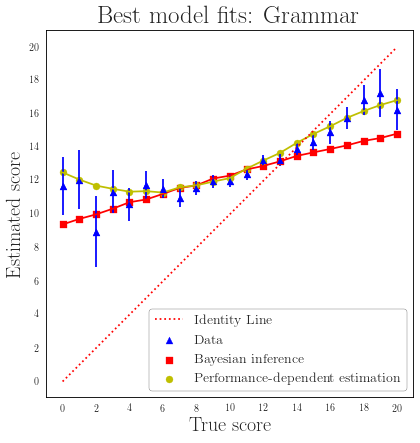

In [50]:
# plot model predictions and data means

k = gram_all.absAssess1.groupby(gram_all.score).mean()
# k=k[:-1]
sems = gram_all.absAssess1.groupby(gram_all.score).sem() # SEMs
# sems=sems[:-1]
conf = sems*1.96

score = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# scoreNoZero = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(score, k, label="Data",color='b',marker='^')
ax.errorbar(score, k, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(score, preds_ind['393'],color='r',label="_nolegend_")
ax.scatter(score, preds_ind['393'], label="Bayesian inference",color='r',marker='s')
ax.plot(score, preds_dep['3017'],color='y',label='_nolegend_')
ax.scatter(score, preds_dep['3017'], label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Best model fits: Grammar', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(-1, color='black')
plt.axhline(21, color='black')
plt.axvline(21, color='black')
ax.set_xlim(-1,21)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks(np.arange(0, 22, step=2))

ax.set_xlabel('True score',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([0,5,10,15,20],[0,5,10,15,20], "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_model_means_grammar.png')
# fig.savefig('figs/Best_model_means_grammar.eps', dpi=1000)

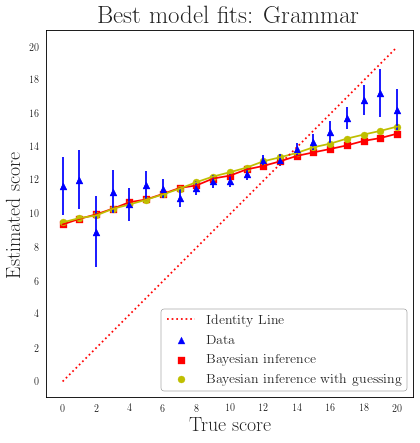

In [30]:
# plot model predictions and data means

k = gram_all.absAssess1.groupby(gram_all.score).mean()
# k=k[:-1]
sems = gram_all.absAssess1.groupby(gram_all.score).sem() # SEMs
# sems=sems[:-1]
conf = sems*1.96

score = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# scoreNoZero = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(score, k, label="Data",color='b',marker='^')
ax.errorbar(score, k, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(score, preds_ind['393'],color='r',label="_nolegend_")
ax.scatter(score, preds_ind['393'], label="Bayesian inference",color='r',marker='s')
ax.plot(score, preds_guess['239'],color='y',label='_nolegend_')
ax.scatter(score, preds_guess['239'], label="Bayesian inference with guessing",color='y')


ax.set_facecolor('white')
plt.title('Best model fits: Grammar', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(-1, color='black')
plt.axhline(21, color='black')
plt.axvline(21, color='black')
ax.set_xlim(-1,21)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks(np.arange(0, 22, step=2))

ax.set_xlabel('True score',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([0,5,10,15,20],[0,5,10,15,20], "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_grammar_ind_guess.png')
# fig.savefig('figs/Best_grammar_ind_guess.eps', dpi=1000)

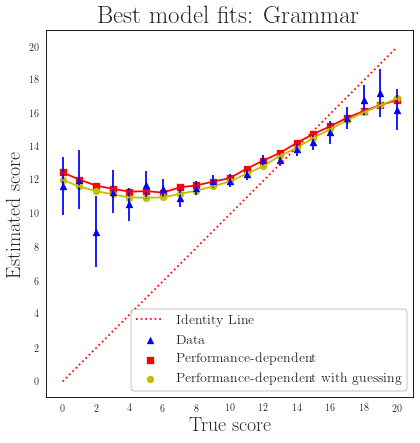

In [44]:
# plot model predictions and data means

k = gram_all.absAssess1.groupby(gram_all.score).mean()
# k=k[:-1]
sems = gram_all.absAssess1.groupby(gram_all.score).sem() # SEMs
# sems=sems[:-1]
conf = sems*1.96

score = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# scoreNoZero = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(score, k, label="Data",color='b',marker='^')
ax.errorbar(score, k, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(score, preds_dep['3017'],color='r',label="_nolegend_")
ax.scatter(score, preds_dep['3017'], label="Performance-dependent",color='r',marker='s')
ax.plot(score, preds_dk_guess['2535'],color='y',label='_nolegend_')
ax.scatter(score, preds_dk_guess['2535'], label="Performance-dependent with guessing",color='y')


ax.set_facecolor('white')
plt.title('Best model fits: Grammar', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(-1, color='black')
plt.axhline(21, color='black')
plt.axvline(21, color='black')
ax.set_xlim(-1,21)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks(np.arange(0, 22, step=2))

ax.set_xlabel('True score',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([0,5,10,15,20],[0,5,10,15,20], "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_grammar_dep_guess.png')
# fig.savefig('figs/Best_grammar_dep_guess.eps', dpi=1000)

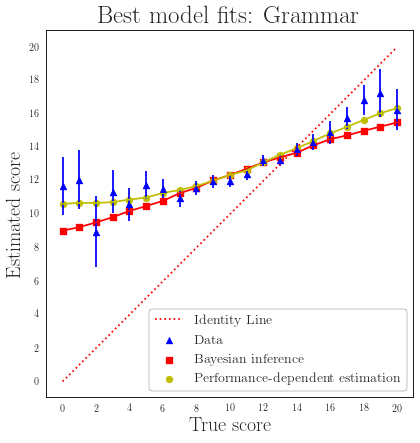

In [44]:
# plot model predictions and data means -GUESS MODEL

k = gram_all.absAssess1.groupby(gram_all.score).mean()
# k=k[:-1]
sems = gram_all.absAssess1.groupby(gram_all.score).sem() # SEMs
# sems=sems[:-1]
conf = sems*1.96

score = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# scoreNoZero = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(score, k, label="Data",color='b',marker='^')
ax.errorbar(score, k, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(score, preds_guess['239'],color='r',label="_nolegend_")
ax.scatter(score, preds_guess['239'], label="Bayesian inference",color='r',marker='s')
ax.plot(score, preds_dk_guess['2642'],color='y',label='_nolegend_')
ax.scatter(score, preds_dk_guess['2642'], label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Best model fits: Grammar', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(-1, color='black')
plt.axhline(21, color='black')
plt.axvline(21, color='black')
ax.set_xlim(-1,21)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(0, 22, step=2))
ax.set_yticks(np.arange(0, 22, step=2))

ax.set_xlabel('True score',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([0,5,10,15,20],[0,5,10,15,20], "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_grammar_guess.png')
# fig.savefig('figs/Best_grammar_guess.eps', dpi=1000)

### Quartile plot

In [45]:
gram_all['quartile'] = pd.qcut(gram_all["score"], 4)

In [46]:
gram_all['quartile'].value_counts()

(-0.001, 8.0]    1091
(10.0, 13.0]     1078
(8.0, 10.0]       748
(13.0, 20.0]      598
Name: quartile, dtype: int64

In [47]:
scores_quart = gram_all.score.groupby(gram_all.quartile).mean()
scores_quart

quartile
(-0.001, 8.0]     6.182401
(8.0, 10.0]       9.524064
(10.0, 13.0]     11.918367
(13.0, 20.0]     15.108696
Name: score, dtype: float64

In [48]:
SAquarts = gram_all.absAssess1.groupby(gram_all.quartile).mean()
SAquarts

quartile
(-0.001, 8.0]    11.321723
(8.0, 10.0]      11.989305
(10.0, 13.0]     12.920223
(13.0, 20.0]     14.500000
Name: absAssess1, dtype: float64

In [49]:
SAquarts_sem = gram_all.absAssess1.groupby(gram_all.quartile).sem()
SAquarts_sem

quartile
(-0.001, 8.0]    0.130577
(8.0, 10.0]      0.138975
(10.0, 13.0]     0.103949
(13.0, 20.0]     0.127960
Name: absAssess1, dtype: float64

In [50]:
gram_all.absAssess1.groupby(gram_all.quartile).std()

quartile
(-0.001, 8.0]    4.312992
(8.0, 10.0]      3.800922
(10.0, 13.0]     3.412950
(13.0, 20.0]     3.129130
Name: absAssess1, dtype: float64

In [51]:
gram_all['ind'] = [preds_guess['239'][x] for x in gram_all['score'].astype(int)]

In [52]:
gram_all['dep'] = [preds_dk_guess['2642'][x] for x in gram_all['score'].astype(int)]

In [53]:
ind_quarts = gram_all.ind.groupby(gram_all.quartile).mean()
ind_quarts

quartile
(-0.001, 8.0]    10.934071
(8.0, 10.0]      12.190058
(10.0, 13.0]     13.045430
(13.0, 20.0]     14.100698
Name: ind, dtype: float64

In [54]:
dep_quarts = gram_all.dep.groupby(gram_all.quartile).mean()
dep_quarts

quartile
(-0.001, 8.0]    11.312894
(8.0, 10.0]      12.187277
(10.0, 13.0]     13.058042
(13.0, 20.0]     14.425899
Name: dep, dtype: float64

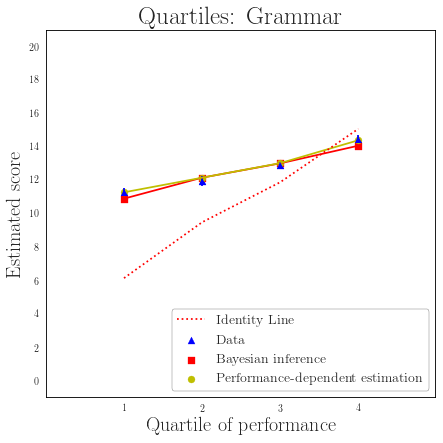

In [56]:
# plot model predictions and data means

conf = SAquarts_sem*1.96

quarts = [1,2,3,4]

fig, ax = plt.subplots()

# ax.scatter(scoreNoZero, k, label="data",marker='^')
#ax.scatter(data.score, data.absAssess1, label="data",marker='^')
ax.scatter(quarts, SAquarts, label="Data",color='b',marker='^')
ax.errorbar(quarts, SAquarts, conf,label="_nolegend_",fmt='^',color='b')
ax.plot(quarts, ind_quarts,color='r',label="_nolegend_")
ax.scatter(quarts, ind_quarts, label="Bayesian inference",color='r',marker='s')
ax.plot(quarts, dep_quarts,color='y',label='_nolegend_')
ax.scatter(quarts, dep_quarts, label="Performance-dependent estimation",color='y')


ax.set_facecolor('white')
plt.title('Quartiles: Grammar', fontsize=25)
plt.axhline(-1, color='black')
plt.axvline(0, color='black')
plt.axhline(21, color='black')
plt.axvline(5, color='black')
ax.set_xlim(0,5)
ax.set_ylim(-1,21)
ax.set_xticks(np.arange(1, 5, step=1))
ax.set_yticks(np.arange(0, 22, step=2))
ax.set_xlabel('Quartile of performance',fontsize = 20)
ax.set_ylabel('Estimated score',fontsize = 20)
identity_line = ax.plot([1,2,3,4],scores_quart, "r:",label='Identity Line')
legend = ax.legend(loc='lower right', prop={'size':14},frameon=True,facecolor='w',edgecolor='k')

fig.set_size_inches(7,7)
# ax.set_aspect('equal', 'box-forced')

plt.gcf().subplots_adjust(bottom=0.15)

plt.show()
# fig.savefig('figs/Best_model_quartiles_grammar.png')
# fig.savefig('figs/Best_model_quartiles_grammar.eps', dpi=1000)

### Quadratic trend analysis

In [57]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [58]:
x = gram_all.score
y = gram_all.absAssess1

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

3.731838944940277
0.08927476001825863


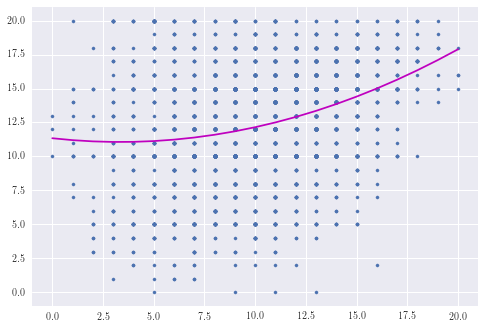

In [38]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [43]:
model.coef_

array([[ 0.        , -0.16498971,  0.02461279]])

In [44]:
model.intercept_

array([11.34178274])

In [45]:
model.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>

In [52]:
import os
os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Versions/3.2/Resources'

import rpy2

# the following lines will allow us to convert between Pandas DataFrames and R DataFrames
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects.conversion import ri2py

# this loads the R magic extension
%load_ext rpy2.ipython

In [53]:
gram_all['score2'] = [score**2 for score in gram_all.score]
gram_all[['score','score2']].head()

,score,score2
7,4.0,16.0
8,10.0,100.0
9,6.0,36.0
10,11.0,121.0
11,10.0,100.0


In [54]:
%%R -i gram_all

model0 <- lm(absAssess1 ~ score + score2, data=gram_all)
summary(model0)
# anova(model0)


Call:
lm(formula = absAssess1 ~ score + score2, data = gram_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3565  -2.3565   0.1495   2.6253   8.9317 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.341783   0.419425  27.041  < 2e-16 ***
score       -0.164990   0.085900  -1.921   0.0548 .  
score2       0.024613   0.004205   5.853 5.28e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.733 on 3512 degrees of freedom
Multiple R-squared:  0.08927,	Adjusted R-squared:  0.08876 
F-statistic: 172.1 on 2 and 3512 DF,  p-value: < 2.2e-16



In [55]:
%%R -i gram_all

model1 <- lm(absAssess1 ~ score, data=gram_all)
print(sum(model1$residuals^2))
summary(model1)
# anova(model1)

[1] 49429.53

Call:
lm(formula = absAssess1 ~ score, data = gram_all)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.4168  -2.4389   0.2573   2.5611  10.4946 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.1794     0.1995   46.02   <2e-16 ***
score         0.3260     0.0186   17.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.751 on 3513 degrees of freedom
Multiple R-squared:  0.08039,	Adjusted R-squared:  0.08013 
F-statistic: 307.1 on 1 and 3513 DF,  p-value: < 2.2e-16



In [85]:
# f squared (effect size for nested models)
rsq_0 = 0.08876
rsq_1 = 0.08013

(rsq_0 - rsq_1)/(1 - rsq_0)

0.00947061147447434

In [32]:
%%R -i gram_all
print(sum(model1$residuals^2))
print(sum(model0$residuals^2))

[1] 49429.53
[1] 48952.08


In [48]:
df1 = 3513
df2 = 3512
sse1 = 49429.53
sse2 = 48952.08

In [37]:
f = ((sse1-sse2)/(df1-df2))/(sse2/df2)
f

34.253996970097894

In [80]:
%%R -i gram_all
anova(model1,model0)

Analysis of Variance Table

Model 1: absAssess1 ~ score
Model 2: absAssess1 ~ score + score2
  Res.Df   RSS Df Sum of Sq      F    Pr(>F)    
1   3513 49430                                  
2   3512 48952  1    477.46 34.254 5.279e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [66]:
df_effect =  1
df_error =  3512
F_effect =  34.254
print('partial eta2: ', (df_effect*F_effect)/((df_effect*F_effect)+df_error))

partial eta2:  0.06699996479245149


In [64]:
%%R -i gram_all
477/sum(model0$residuals^2)

[1] 0.009744224


In [59]:
%%R -i gram_all
anova(model0)

Analysis of Variance Table

Response: absAssess1
            Df Sum Sq Mean Sq F value    Pr(>F)    
score        1   4321  4321.1 310.013 < 2.2e-16 ***
score2       1    477   477.5  34.254 5.279e-09 ***
Residuals 3512  48952    13.9                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [79]:
%%R -i gram_all
eta_sq(model0)


Error in withVisible({ : could not find function "eta_sq"


/Users/racheljansen/anaconda/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in withVisible({ : could not find function "eta_sq"

  warnings.warn(x, RRuntimeWarning)
